# WeatherPy
----

### Analysis
* It is the first day of Spring (Mar 21) in the Northern hemisphere, and therefore the first day of Autumn in the Southern hemisphere, so more than any other time of year, we might expect the peak temperature to sit right on the equator (0 deg latitude). The temperature peak does appear to sit very near the equator, but seems to be slightly shifted to the North.
* There doesn't appear to be a strong relationship between latitude and cloudiness.
* The cities with the highest wind speeds are in the Northern Hemisphere.
* Cities in the Northern hemisphere seem to have a broader range of humidities, whereas there are relatively few cities in the Southern hemisphere that have humidities around 40%.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={api_key}&units=imperial&q="

In [4]:
used_cities = []
lat = []
temp = []
max_temp = []
hum = []
cloud = []
wind = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print(f"Processing number {len(lat)+1} - City: {city} - City ID: {response['id']}")
        used_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])

    except: 
        print(f"Error in processing City: {city} - {response}")

Processing number 1 - City: jamestown - City ID: 2069194
Processing number 2 - City: puerto ayora - City ID: 3652764
Processing number 3 - City: port alfred - City ID: 964432
Processing number 4 - City: kindersley - City ID: 5992154
Processing number 5 - City: nikolskoye - City ID: 546105
Processing number 6 - City: georgetown - City ID: 3378644
Processing number 7 - City: cape town - City ID: 3369157
Processing number 8 - City: castro - City ID: 3896218
Processing number 9 - City: diamantino - City ID: 3464724
Processing number 10 - City: nishihara - City ID: 1850144
Processing number 11 - City: dargaville - City ID: 2191911
Error in processing City: galiwinku - {'cod': '404', 'message': 'city not found'}
Processing number 12 - City: thompson - City ID: 6165406
Processing number 13 - City: punta arenas - City ID: 3874787
Processing number 14 - City: mustasaari - City ID: 651301
Error in processing City: illoqqortoormiut - {'cod': '404', 'message': 'city not found'}
Processing number 1

Processing number 117 - City: kununurra - City ID: 2068110
Processing number 118 - City: xichang - City ID: 1789647
Processing number 119 - City: gusinoye ozero - City ID: 2023778
Processing number 120 - City: upata - City ID: 3625710
Processing number 121 - City: puerto escondido - City ID: 3520994
Processing number 122 - City: caravelas - City ID: 3466980
Processing number 123 - City: slave lake - City ID: 6149374
Processing number 124 - City: tagusao - City ID: 1684245
Processing number 125 - City: thinadhoo - City ID: 1337610
Processing number 126 - City: broome - City ID: 2656067
Processing number 127 - City: verkhoyansk - City ID: 2013465
Error in processing City: belushya guba - {'cod': '404', 'message': 'city not found'}
Processing number 128 - City: cherskiy - City ID: 2126199
Processing number 129 - City: port elizabeth - City ID: 4501427
Error in processing City: grand river south east - {'cod': '404', 'message': 'city not found'}
Processing number 130 - City: ponta do sol -

Processing number 236 - City: iberia - City ID: 3938531
Processing number 237 - City: provideniya - City ID: 4031574
Error in processing City: ngukurr - {'cod': '404', 'message': 'city not found'}
Processing number 238 - City: touros - City ID: 3386213
Processing number 239 - City: elko - City ID: 5703670
Processing number 240 - City: paraiso - City ID: 4011743
Processing number 241 - City: nanpiao - City ID: 2035644
Processing number 242 - City: los llanos de aridane - City ID: 2514651
Processing number 243 - City: praya - City ID: 1630662
Processing number 244 - City: bilma - City ID: 2446796
Processing number 245 - City: valentin gomez farias - City ID: 4011743
Processing number 246 - City: contamana - City ID: 3697838
Processing number 247 - City: katsuura - City ID: 1865309
Processing number 248 - City: plon - City ID: 2771828
Processing number 249 - City: the valley - City ID: 3573374
Processing number 250 - City: khasan - City ID: 2039557
Processing number 251 - City: buraydah -

Processing number 368 - City: waverly - City ID: 4792494
Processing number 369 - City: bela - City ID: 1182998
Processing number 370 - City: zhuhai - City ID: 2052479
Processing number 371 - City: puro - City ID: 1706889
Processing number 372 - City: katobu - City ID: 1640972
Processing number 373 - City: dudinka - City ID: 1507116
Processing number 374 - City: luganville - City ID: 2136150
Processing number 375 - City: boshnyakovo - City ID: 2126493
Processing number 376 - City: sosnogorsk - City ID: 490391
Processing number 377 - City: tete - City ID: 1026014
Processing number 378 - City: zhigansk - City ID: 2012530
Processing number 379 - City: sobolevo - City ID: 525426
Processing number 380 - City: lamar - City ID: 5427957
Processing number 381 - City: wukari - City ID: 2318921
Processing number 382 - City: nouadhibou - City ID: 2377457
Processing number 383 - City: tomsani - City ID: 664797
Processing number 384 - City: dingle - City ID: 1714733
Processing number 385 - City: mata

Processing number 493 - City: yayva - City ID: 468560
Processing number 494 - City: santa isabel do rio negro - City ID: 3662489
Error in processing City: borujan - {'cod': '404', 'message': 'city not found'}
Processing number 495 - City: vigrestad - City ID: 3131824
Processing number 496 - City: manokwari - City ID: 1636308
Processing number 497 - City: whitley bay - City ID: 2634032
Processing number 498 - City: waipawa - City ID: 2185329
Error in processing City: nizhneyansk - {'cod': '404', 'message': 'city not found'}
Processing number 499 - City: tateyama - City ID: 1849876
Error in processing City: jomalig - {'cod': '404', 'message': 'city not found'}
Processing number 500 - City: gigmoto - City ID: 1712961
Processing number 501 - City: yumen - City ID: 1528998
Processing number 502 - City: gat - City ID: 2249901
Processing number 503 - City: sioux lookout - City ID: 6148373
Processing number 504 - City: suntar - City ID: 2015913
Processing number 505 - City: kelowna - City ID: 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_dict = {
    "city": used_cities,
    "lat": lat,
    "temp": temp,
    "max temp" : max_temp,
    "humidity": hum,
    "cloudiness": cloud,
    "wind speed": wind}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(r"Images/weather_dataframe.csv", header=True, index=None)

weather_data.head()

,city,lat,temp,max temp,humidity,cloudiness,wind speed
0,Rikitea,-23.12,78.57,78.57,100,0,20.49
1,Okha,53.59,-7.83,-7.83,93,48,4.38
2,Issoire,45.54,57.20,57.20,33,0,8.05
3,Provideniya,64.42,3.15,3.15,100,68,20.15
4,Bluff,-23.58,69.30,69.30,92,0,4.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

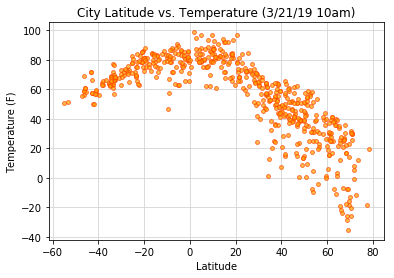

In [22]:
plt.scatter(weather_data["lat"], weather_data["temp"], s=15, c="orange", edgecolors="orangered", alpha=0.7)
plt.grid(True, color="lightgrey")
plt.rc('axes', axisbelow=True)
plt.title("City Latitude vs. Temperature (3/21/19 10am)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)");

plt.savefig("Images/lat_vs_temp.png", bbox_inches="tight")

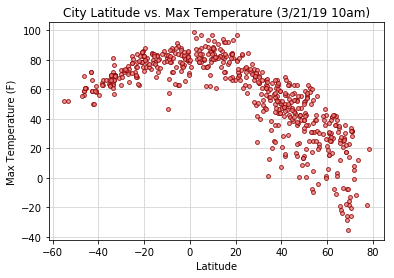

In [23]:
plt.scatter(weather_data["lat"], weather_data["max temp"], s=15, c="lightcoral", edgecolors="darkred", alpha=0.8)
plt.grid(True, color="lightgrey")
plt.rc('axes', axisbelow=True)
plt.title("City Latitude vs. Max Temperature (3/21/19 10am)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/lat_vs_max_temp.png", bbox_inches="tight")

#### Latitude vs. Humidity Plot

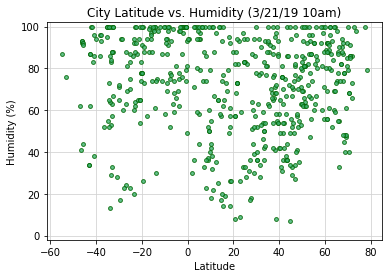

In [24]:
plt.scatter(weather_data["lat"], weather_data["humidity"], s=15, c="mediumseagreen", edgecolors="darkgreen", alpha=0.8)
plt.grid(True, color="lightgrey")
plt.rc('axes', axisbelow=True)
plt.title("City Latitude vs. Humidity (3/21/19 10am)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-2, 102);

plt.savefig("Images/lat_vs_humidity.png", bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

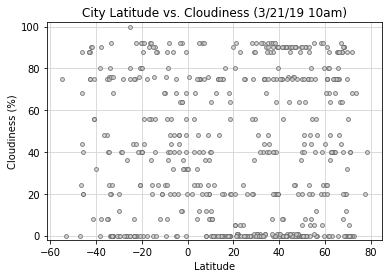

In [25]:
plt.scatter(weather_data["lat"], weather_data["cloudiness"], s=15, c="lightgrey", edgecolors="dimgrey", alpha=0.8)
plt.grid(True, color="lightgrey")
plt.rc('axes', axisbelow=True)
plt.title("City Latitude vs. Cloudiness (3/21/19 10am)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-2, 102);

plt.savefig("Images/lat_vs_cloudiness.png", bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

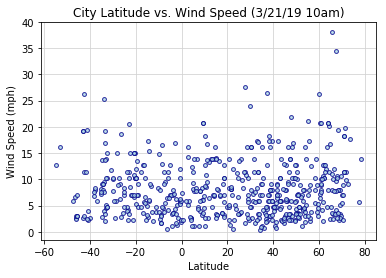

In [26]:
plt.scatter(weather_data["lat"], weather_data["wind speed"], s=15, c="lightblue", edgecolors="darkblue", alpha=0.8)
plt.grid(True, color="lightgrey")
plt.rc('axes', axisbelow=True)
plt.title("City Latitude vs. Wind Speed (3/21/19 10am)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)");

plt.savefig("Images/lat_vs_wind_speed.png", bbox_inches="tight")